## Task-D: Collinear features and their effect on linear models

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('task_d.csv')

In [5]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
x            100 non-null float64
y            100 non-null float64
z            100 non-null float64
x*x          100 non-null float64
2*y          100 non-null float64
2*z+3*x*x    100 non-null float64
w            100 non-null float64
target       100 non-null int64
dtypes: float64(7), int64(1)
memory usage: 6.4 KB


In [7]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>

1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.9)

In [9]:
# First standasize 
# from sklearn.preprocessing import StandardScaler
# get_standard_data     = StandardScaler().fit_transform(X)
get_covariance_matrix = np.matmul(X_train.T, X_train)
get_covariance_matrix.shape

(7, 7)

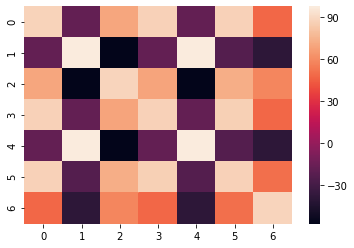

In [10]:
sns.heatmap(get_covariance_matrix)

In [11]:
params = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
gridSearchCVModel = GridSearchCV(      LogisticRegression(), params, scoring='f1', cv=5)
                            
gridSearchCVModel.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [12]:

print(gridSearchCVModel.best_estimator_)
print(gridSearchCVModel.score(X_test, y_test))

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
1.0


In [13]:
gridSearchCVModel.best_params_, gridSearchCVModel.best_score_

({'C': 0.0001}, 1.0)

In [14]:
best_hyper_paramter_model = LogisticRegression(C=0.0001)
best_hyper_paramter_model.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
best_hyper_paramter_model.score(X_test, y_test)

1.0

In [16]:
best_hyper_paramter_model.intercept_

array([-9.83433598e-05])

In [17]:
best_hyper_paramter_model.coef_

array([[ 0.0031093 , -0.00326677,  0.00427725,  0.00306347, -0.00326677,
         0.00327355,  0.00280485]])

In [18]:
#adding noise to the data


In [32]:

noise_data = data
store_X = noise_data.drop(['target'], axis=1).values
noise_Y = noise_data['target'].values
''' Adding the noise '''
noise_X = store_X+(10**-2)

In [60]:
''' we can see the noise added to all data points'''
diff = noise_X - X
diff[0:5,:]

array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]])

x


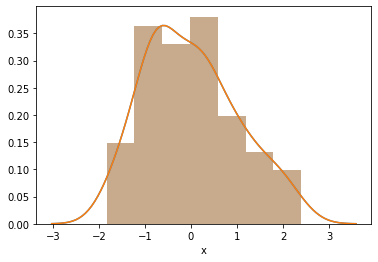

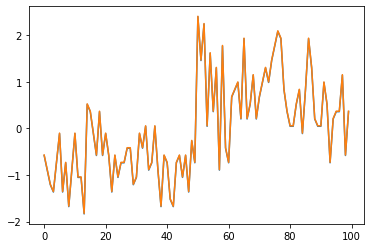

y


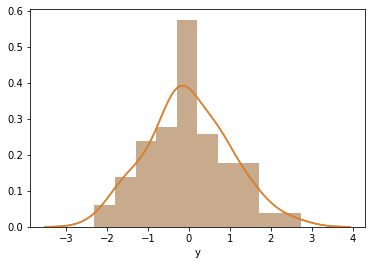

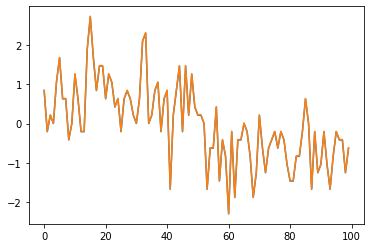

z


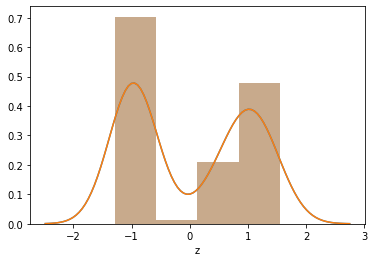

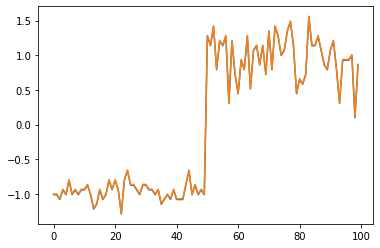

x*x


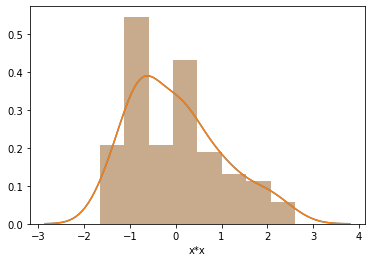

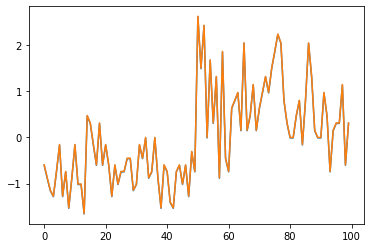

2*y


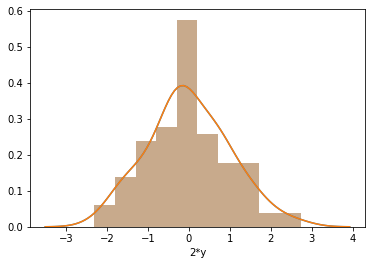

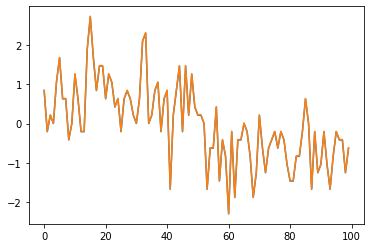

2*z+3*x*x


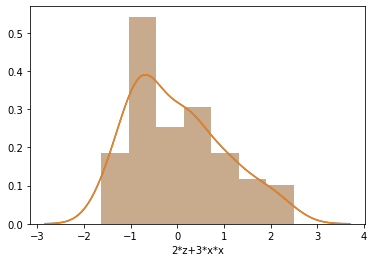

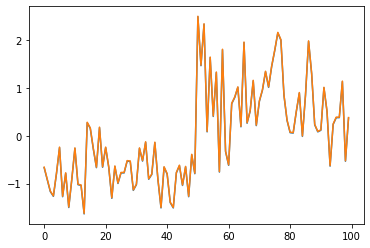

w


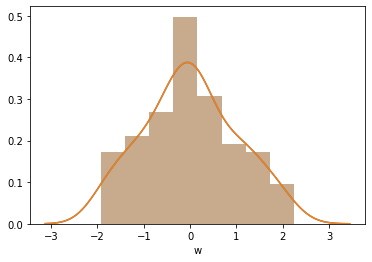

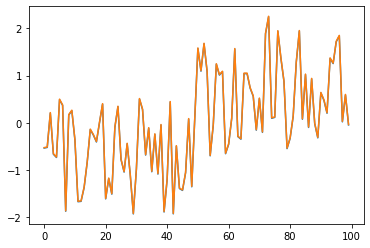

target


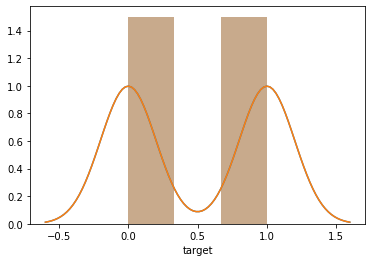

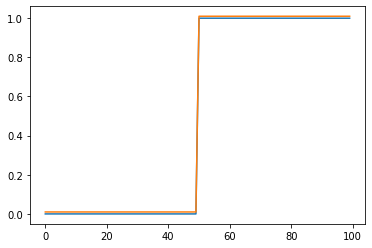

In [42]:
import seaborn as sns
for indx, each_feature in enumerate(data.columns):
    print(each_feature)
    sns.distplot(noise_data[each_feature])
    sns.distplot(data[each_feature])
    plt.show()
    plt.plot(noise_data[each_feature])
    plt.plot(data[each_feature]+(10**-2))
    plt.show()

In [43]:

noise_X_train, noise_X_test, noise_y_train, noise_y_test = train_test_split(noise_X, noise_Y, train_size=.9)

In [44]:
noise_best_hyper_paramter_model = LogisticRegression(C=0.0001)
noise_best_hyper_paramter_model.fit(noise_X_train, noise_y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
noise_best_hyper_paramter_model.score(noise_X_test, noise_y_test)

1.0

In [46]:
noise_best_hyper_paramter_model.coef_

array([[ 0.00320143, -0.00309833,  0.00431083,  0.00315118, -0.00309833,
         0.00335651,  0.00291327]])

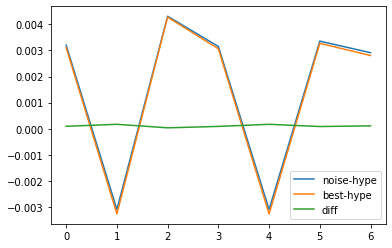

array([9.21381181e-05, 1.68435542e-04, 3.35719836e-05, 8.77110951e-05,
       1.68435542e-04, 8.29529304e-05, 1.08427875e-04])

In [57]:
plt.plot(noise_best_hyper_paramter_model.coef_[0], label='noise-hype')
plt.plot(best_hyper_paramter_model.coef_[0], label='best-hype')
plt.plot(noise_best_hyper_paramter_model.coef_[0] - best_hyper_paramter_model.coef_[0], label='diff')
plt.legend()
plt.show()
noise_best_hyper_paramter_model.coef_[0] - best_hyper_paramter_model.coef_[0]

In [83]:
logestic_regression_diff = noise_best_hyper_paramter_model.coef_[0] - best_hyper_paramter_model.coef_[0]


#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [58]:
svm_data  = data 

In [59]:
svm_data_X = data.drop(['target'], axis=1).values
svm_data_Y = data['target'].values

In [73]:
svm_covariance_matrix = np.matmul(svm_data_X.T, svm_data_X)
svm_covariance_matrix.shape

(7, 7)

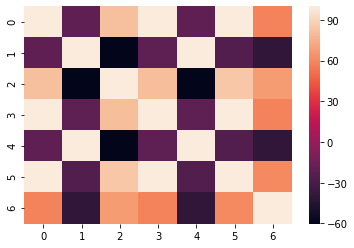

In [74]:
sns.heatmap(svm_covariance_matrix)

In [61]:
from sklearn.svm import LinearSVC

In [64]:
params = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
svm_model = GridSearchCV(LinearSVC(),  params, scoring='f1', cv=5)

In [65]:
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_data_X, svm_data_Y, train_size=.9)
svm_model.fit(svm_X_train,svm_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [66]:
svm_model.best_estimator_

LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [67]:
svm_model.best_params_

{'C': 0.0001}

In [69]:
best_svm_model = LinearSVC(C=0.0001)
best_svm_model.fit(svm_X_train,svm_y_train)

LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [71]:
best_svm_model.score(svm_X_test,svm_y_test)

1.0

In [72]:
best_svm_model.coef_

array([[ 0.01259841, -0.01132096,  0.01616717,  0.01243211, -0.01132096,
         0.01314092,  0.0111428 ]])

In [75]:
svm_noise_data = data
svm_store_X = svm_noise_data.drop(['target'], axis=1).values
svm_noise_Y = svm_noise_data['target'].values
''' Adding the noise '''
svm_noise_X = svm_store_X+(10**-2)

x


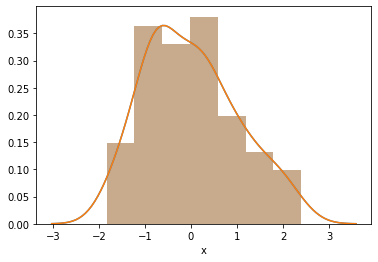

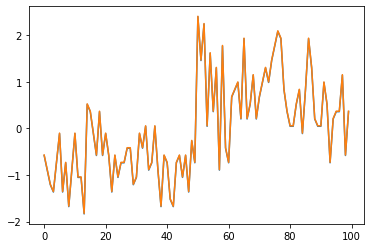

y


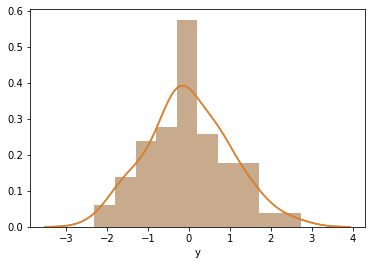

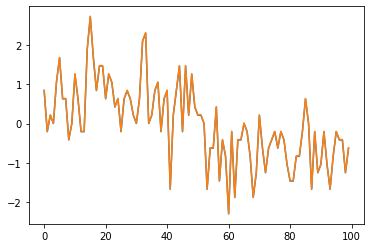

z


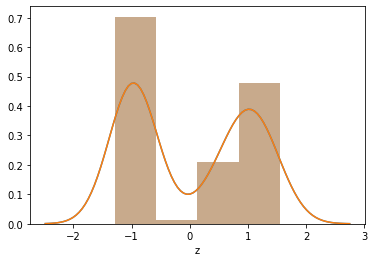

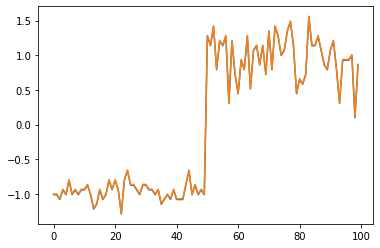

x*x


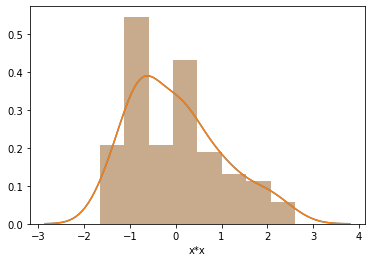

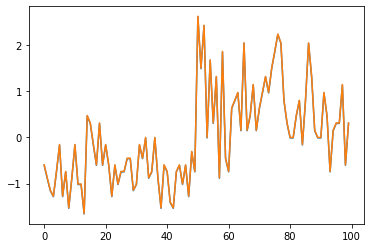

2*y


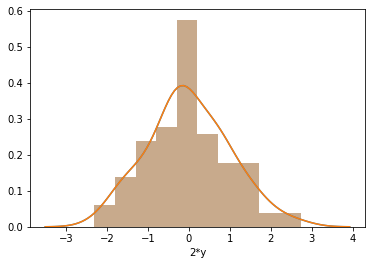

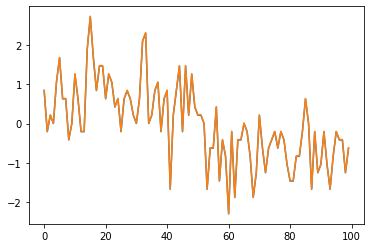

2*z+3*x*x


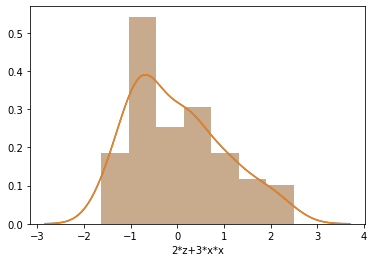

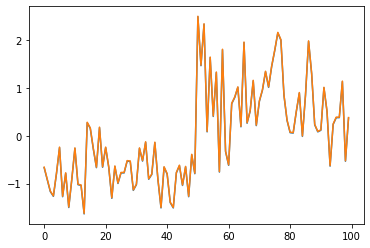

w


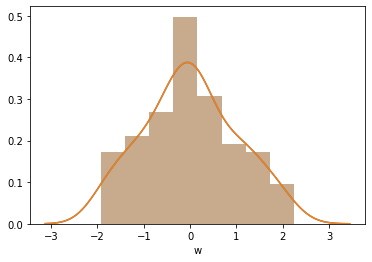

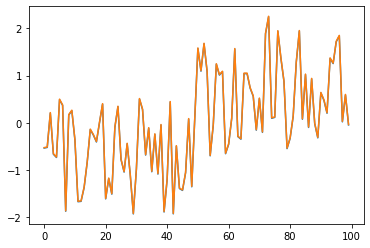

target


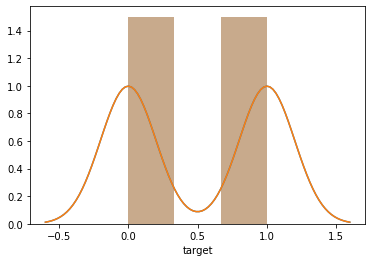

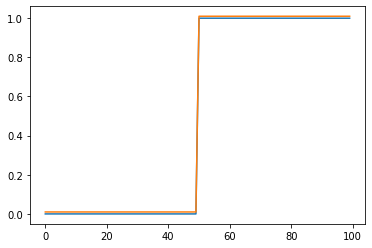

In [76]:
import seaborn as sns
for indx, each_feature in enumerate(data.columns):
    print(each_feature)
    sns.distplot(svm_noise_data[each_feature])
    sns.distplot(data[each_feature])
    plt.show()
    plt.plot(svm_noise_data[each_feature])
    plt.plot(data[each_feature]+(10**-2))
    plt.show()

In [77]:

svm_noise_X_train, svm_noise_X_test, svm_noise_y_train, svm_noise_y_test = train_test_split(svm_noise_X, svm_noise_Y, train_size=.9)



In [78]:
svm_noise_best_hyper_paramter_model = LinearSVC(C=0.0001)
svm_noise_best_hyper_paramter_model.fit(svm_noise_X_train, svm_noise_y_train)

LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [79]:
svm_noise_best_hyper_paramter_model.score(svm_noise_X_test, svm_noise_y_test)

1.0

In [80]:
svm_noise_best_hyper_paramter_model.coef_

array([[ 0.0128396 , -0.01100228,  0.01642959,  0.01268599, -0.01100228,
         0.0134011 ,  0.01108019]])

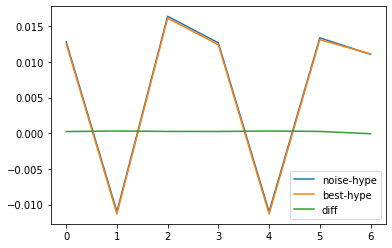

array([ 2.41185753e-04,  3.18685895e-04,  2.62419647e-04,  2.53880301e-04,
        3.18685895e-04,  2.60184311e-04, -6.26093661e-05])

In [82]:
plt.plot(svm_noise_best_hyper_paramter_model.coef_[0], label='noise-hype')
plt.plot(best_svm_model.coef_[0], label='best-hype')
plt.plot(svm_noise_best_hyper_paramter_model.coef_[0] - best_svm_model.coef_[0], label='diff')
plt.legend()
plt.show()
svm_weights_diff = svm_noise_best_hyper_paramter_model.coef_[0] - best_svm_model.coef_[0]
svm_weights_diff

In [84]:
svm_weights_diff - logestic_regression_diff

array([ 0.00014905,  0.00015025,  0.00022885,  0.00016617,  0.00015025,
        0.00017723, -0.00017104])